# Q.1

## a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def f(x,y1,y2):
    return -1 * 4.16 * 1e-8 * (10 - x)

In [36]:
def rk4_coupled_oscillator(f, y1_0, y2_0, t0, tf, h):
    """
    Solves a specific system of two coupled first-order ODEs using RK4.
    The system is expected to be in the form:
    y1' = y2
    y2' = f(t, y1, y2)

    This is a specialized version of the general rk4 solver for this common
    structure, often arising from second-order ODEs.

    Args:
        f (callable): The function defining the second derivative, f(t, y1, y2).
        y1_0 (float): The initial condition for y1 at time t0.
        y2_0 (float): The initial condition for y2 at time t0.
        t0 (float): The starting time.
        tf (float): The ending time.
        h (float): The step size for the integration.

    Returns:
        tuple: A tuple containing:
            - t_points (numpy.ndarray): Array of time points.
            - y_points (numpy.ndarray): 2D array of solution values. Column 0 is y1,
                                        column 1 is y2.
    """
    
    t_points = np.arange(t0, tf + h, h)
    n_steps = len(t_points)

    y_points = np.zeros((n_steps, 2))
    y_points[0] = [y1_0, y2_0]

    y1, y2 = y1_0, y2_0

    for i in range(n_steps - 1):
        t = t_points[i]

        # Calculate k and l coefficients for y1 and y2 respectively
        k1 = h * y2
        l1 = h * f(t, y1, y2)

        k2 = h * (y2 + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y1 + 0.5 * k1, y2 + 0.5 * l1)

        k3 = h * (y2 + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y1 + 0.5 * k2, y2 + 0.5 * l2)

        k4 = h * (y2 + l3)
        l4 = h * f(t + h, y1 + k3, y2 + l3)

        # Update y1 and y2
        y1 = y1 + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y2 = y2 + (l1 + 2*l2 + 2*l3 + l4) / 6.0

        y_points[i+1] = [y1, y2]

    return t_points, y_points

In [37]:
L = 10
x_points, y_points = rk4_coupled_oscillator(f,0, 0, 0, L, h = 0.1)

## b)

In [38]:
ypoints = []
y2points = []
for i in y_points:
    ypoints.append(i[0])
    y2points.append(i[1])

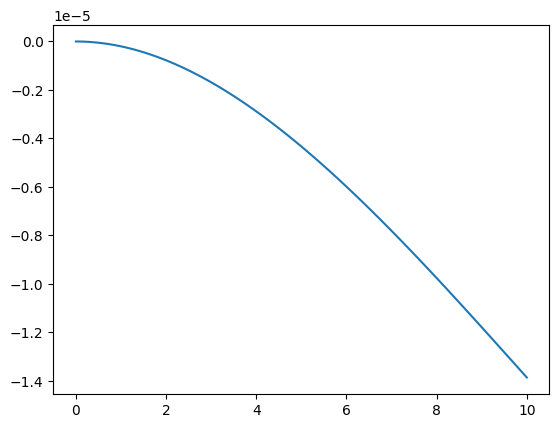

In [39]:
plt.plot(x_points, ypoints)

In [40]:
# Analytical solution
true_vals = []
for i in x_points:
    out = -(2.08 * 1e-8 * (i**2)) + (6.94 * 1e-9 * (i **3))
    true_vals.append(out)

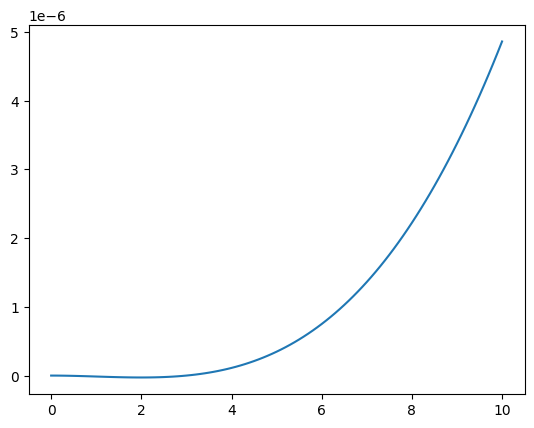

In [41]:
plt.plot(x_points, true_vals)